In [1]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images

display_np_arrays_as_images()

In [2]:
ims = numpy.load("./resources/test_images.npy", allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


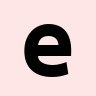

In [3]:
# display the first image (whole 4d tensor can't be rendered)
ims[0]

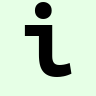

In [4]:
# second image in a batch
ims[1]

In [5]:
# we'll use three operations
from einops import rearrange, reduce, repeat

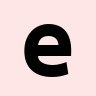

In [50]:
1# rearrange, as the name suggests, rearranges elements
# below we swapped height and width.
# In other words, transposed first two axes (dimensions)
rearrange(ims[0], "h w c -> h w c")

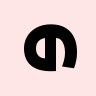

In [14]:
# we could use more verbose names for axes, and result is the same:
rearrange(ims[0], "height width color -> width height color")
# when you operate on same set of axes many times,
# you usually come up with short names.
# That's what we do throughout tutorial - we'll use b (for batch), h, w, and c

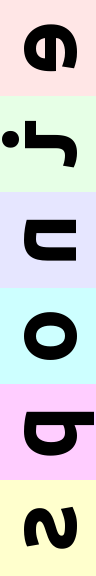

In [47]:
# einops allows seamlessly composing batch and height to a new height dimension
# We just rendered all images by collapsing to 3d tensor!
rearrange(ims, "b h w c -> (b w) h c")

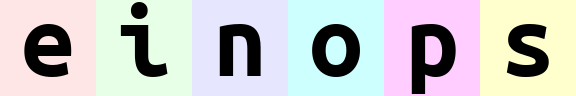

In [31]:
# or compose a new dimension of batch and width
rearrange(ims, "b h w c -> h (b w) c")

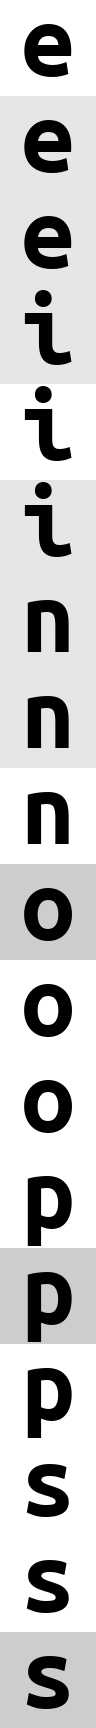

In [46]:
rearrange(ims, "b h w c -> (b c h) w ")

In [36]:
# decomposition is the inverse process - represent an axis as a combination of new axes
# several decompositions possible, so b1=2 is to decompose 6 to b1=2 and b2=3
rearrange(ims, "(b1 b2) h w c -> b1 b2 h w c ", b1=2).shape

(2, 3, 96, 96, 3)

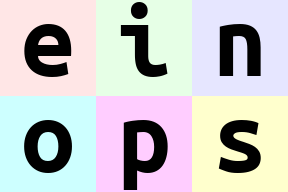

In [57]:
# finally, combine composition and decomposition:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)

In [58]:
import torch

# Define the dimensions
output_features = 3
input_features = 4

# Create the tensors
W = torch.randn(output_features, input_features)   # Shape (3, 4)
x = torch.randn(input_features)                    # Shape (4,)

# --- Standard method using matmul ---
y_standard = torch.matmul(W, x)
# Or using the @ operator
y_standard_at = W @ x

# --- einsum method ---
y_einsum = torch.einsum('oi, i -> o', W, x)

print("Shape of W:", W.shape)
print("Shape of x:", x.shape)
print("-" * 20)
print("Standard matmul result shape:", y_standard.shape)
print("einsum result shape:       ", y_einsum.shape)
print("\nAre the results the same?", torch.allclose(y_standard, y_einsum))

Shape of W: torch.Size([3, 4])
Shape of x: torch.Size([4])
--------------------
Standard matmul result shape: torch.Size([3])
einsum result shape:        torch.Size([3])

Are the results the same? True
